### RESUMO DO PROJETO: SEGMENTAÇÃO DE CLIENTES PARA CAMPANHAS DE MARKETING

Ums empresa automobilística tem intenção de atingir um novo mercado, cujo comportamento tem previsão de ser semelhante ao seu mercado atual. 
A equipe de vendas deseja criar "personas" ou "avatares" para cada tipo de cliente para realizar campanhas direcionadas. Para cada um desses avatares, eles irão recomendar um produto específico com base nas suas características:
- Carro C1: Sedan espaçoso e confiável com aparência elegante que oferece um equilíbrio entre conforto, desempenho e economia
- Carro C2:  Hatchback compacto e moderno, que combina estilo, eficiência e acessibilidade.
- Carro C3:  Compacto econômico e versátil, com um orçamento baixo, esse veículo oferece eficiência de combustível e custos de manutenção acessíveis
- Carro C4: SUV de luxo espaçoso e elegante, com um design sofisticado e tecnologia avançada


<span style = "color:blue"> OBJETIVO: Desenvolver uma clusterização através dos dados existentes que forneça características específicas para cada cluster para melhor direcionar a construção dos avatares pela equipe de marketing.</span>

### DATASET

Origem (Kaggle): https://www.kaggle.com/datasets/vetrirah/customer

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#O dataset de treino tem uma segmentação própria. Como queremos fazer nossa segmentação, desconsideramos essa coluna.
df_train = pd.read_csv("Train.csv").drop(columns = ['Segmentation'])
df_teste = pd.read_csv("Test.csv")

In [3]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


### ANÁLISE EXPLORATÓRIA INICIAL

In [4]:
df_train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

#### Variáveis Numéricas

In [5]:
train_num = ["Age","Family_Size","Work_Experience"]
df_train_num = df_train[train_num]

In [6]:
df_train_num.head()

,Age,Family_Size,Work_Experience
0,22,4.0,1.0
1,38,3.0,NaN
2,67,1.0,1.0
3,67,2.0,0.0
4,40,6.0,NaN


In [7]:
df_train_num.describe()

,Age,Family_Size,Work_Experience
count,8068.000000,7733.000000,7239.000000
mean,43.466906,2.850123,2.641663
std,16.711696,1.531413,3.406763
min,18.000000,1.000000,0.000000
25%,30.000000,2.000000,0.000000
50%,40.000000,3.000000,1.000000
75%,53.000000,4.000000,4.000000
max,89.000000,9.000000,14.000000


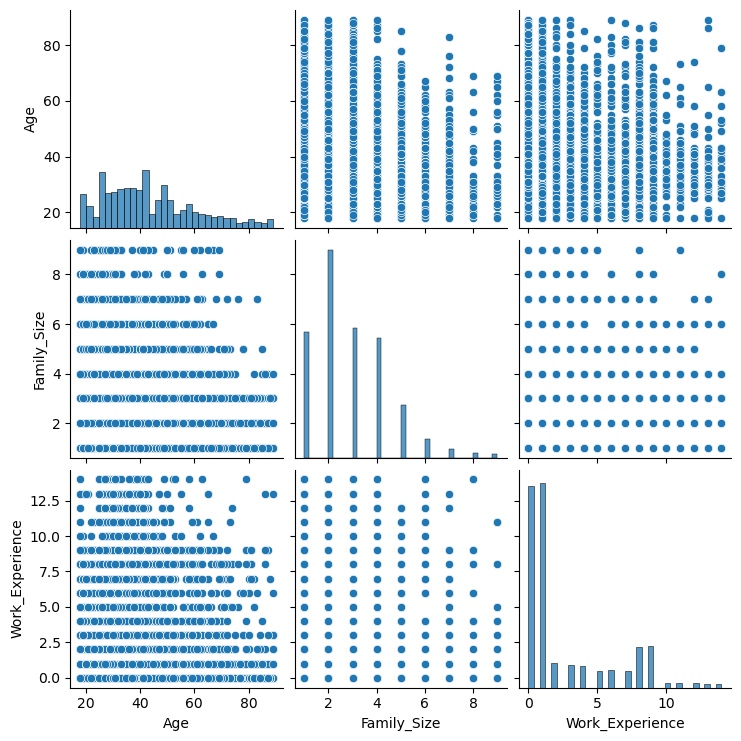

In [8]:
sns.pairplot(df_train[train_num])
plt.show()

#### Variáveis Categóricas

In [9]:
df_var_cat = df_train.select_dtypes(exclude="number")
df_var_cat.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,Male,No,No,Healthcare,Low,Cat_4
1,Female,Yes,Yes,Engineer,Average,Cat_4
2,Female,Yes,Yes,Engineer,Low,Cat_6
3,Male,Yes,Yes,Lawyer,High,Cat_6
4,Female,Yes,Yes,Entertainment,High,Cat_6


In [10]:
#Para a variável spending_score, aplicaremos de forma simplificada a técnica de label-encoding, 
#geralmente utilizada para variáveis categórias ordinais

In [11]:
df_train['Spending_Score'] = df_train['Spending_Score'].map({"Low":0,"Average":1,"High":2})
df_teste['Spending_Score'] = df_teste['Spending_Score'].map({"Low":0,"Average":1,"High":2})

In [12]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,0,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,1,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,2,6.0,Cat_6


In [13]:
#Visualizando o speding_Score para cada profissão
df_train.groupby("Profession")['Spending_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Profession,,,,,,,,
Artist,2516.0,0.594197,0.658535,0.0,0.0,0.0,1.0,2.0
Doctor,688.0,0.347384,0.563281,0.0,0.0,0.0,1.0,2.0
Engineer,699.0,0.487840,0.649715,0.0,0.0,0.0,1.0,2.0
Entertainment,949.0,0.433087,0.585515,0.0,0.0,0.0,1.0,2.0
Executive,599.0,1.454090,0.818359,0.0,1.0,2.0,2.0,2.0
Healthcare,1332.0,0.099099,0.396187,0.0,0.0,0.0,0.0,2.0
Homemaker,246.0,0.455285,0.679160,0.0,0.0,0.0,1.0,2.0
Lawyer,623.0,1.069021,0.983818,0.0,0.0,2.0,2.0,2.0
Marketing,292.0,0.284247,0.656471,0.0,0.0,0.0,0.0,2.0


In [14]:
type(df_train)

pandas.core.frame.DataFrame

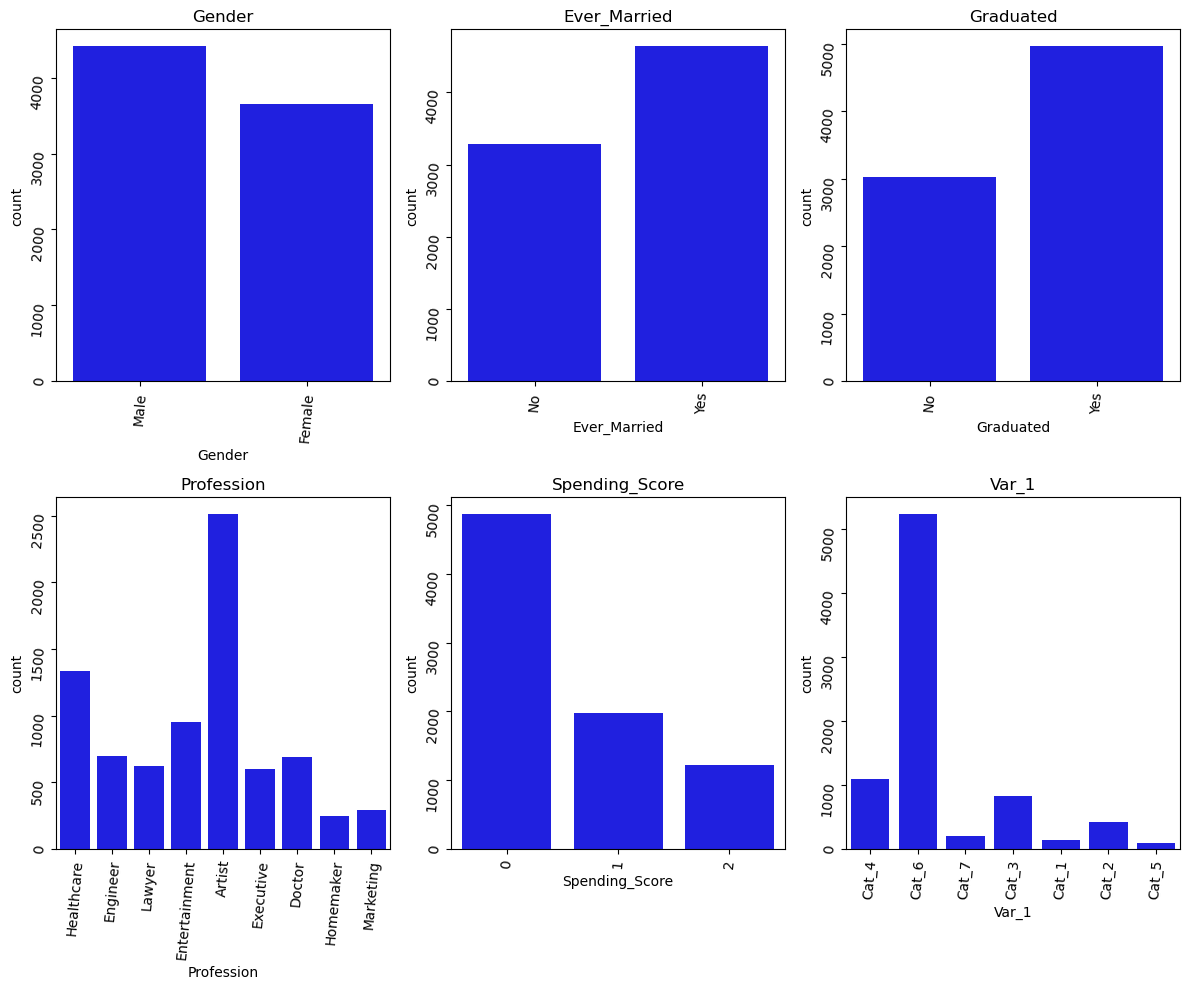

In [15]:
#Visualizando o gráfico de barras para cada variável categórica
cat_col = df_var_cat.columns.tolist()

#Cria a figura e os eixos simultaneamente
fig,ax = plt.subplots(nrows = 2, ncols = 3,figsize=(12,10))

#Loop passando pela lista de colunas categóricas
for i,var in enumerate(cat_col):  #Função enumerate: (índice,coluna) em pares
    ax_atual = ax[i//3,i%3]
    sns.countplot(data=df_train,ax=ax_atual,x=var,color='blue')
    ax_atual.set_title(var)
    ax_atual.tick_params(rotation=85)

plt.tight_layout()
plt.show()

### Pré processamento dos dados

In [16]:
#Transformando variáveis categóricas em números

#Profession e Var_1 : one-hot-encoding
dum = ['Profession','Var_1']
for coluna in dum:
    dummies_train = pd.get_dummies(df_train[coluna],prefix=coluna)
    df_train = df_train.join(dummies_train)
    dummies_test = pd.get_dummies(df_teste[coluna],prefix=coluna)
    df_teste = df_teste.join(dummies_test)

In [17]:
#Variáveis binárias
yes_no = ['Graduated','Ever_Married']
for coluna in yes_no:
    df_train[coluna] = df_train[coluna].map({'Yes':1,'No':0})
    df_teste[coluna] = df_teste[coluna].map({'Yes':1,'No':0})
df_train['Gender']=df_train['Gender'].map({'Female':1,'Male':0})
df_teste['Gender']=df_teste['Gender'].map({'Female':1,'Male':0})

In [18]:
df_train = df_train.drop(columns=['Var_1','Profession'])
df_teste = df_teste.drop(columns=['Var_1','Profession'])

In [19]:
n_duplicatas = df_train.shape[0]-df_train.drop_duplicates().shape[0]
print(n_duplicatas)

0


Não há duplicatas

In [20]:
#Número de NAs por coluna
df_train.isna().sum()

ID                            0
Gender                        0
Ever_Married                140
Age                           0
Graduated                    78
Work_Experience             829
Spending_Score                0
Family_Size                 335
Profession_Artist             0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
Var_1_Cat_1                   0
Var_1_Cat_2                   0
Var_1_Cat_3                   0
Var_1_Cat_4                   0
Var_1_Cat_5                   0
Var_1_Cat_6                   0
Var_1_Cat_7                   0
dtype: int64

In [21]:
possui_na = ['Ever_Married','Graduated','Work_Experience','Family_Size']

### Imputando valores faltantes

Para variáveis numéricas (work_experience e family_size), os valores NAs serão substituídos pela mediana do conjunto de dados. Já para as variáveis categóricas, será feito um modelo de classificação que irá tenter prever qual seria o valor categórico faltante.

In [22]:
def val_faltantes(df_col):
    mediana = df_col.median()
    df_ajustado = df_col.fillna(mediana)
    return df_ajustado

for coluna in ['Work_Experience','Family_Size']:
    df_train[coluna]=val_faltantes(df_train[coluna])


In [23]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed_train = df_train.set_index('ID')
imputed_test = df_teste.set_index('ID')


X = pd.DataFrame(data = imputer.fit_transform(imputed_train), columns = imputed_train.columns.tolist(), index = df_train.ID.values)
X_test = pd.DataFrame(data = imputer.transform(imputed_test), columns = imputed_test.columns.tolist(), index = df_teste.ID.values)


### Normalização/Padronização dos dados

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

num_cols = ['Age','Work_Experience','Family_Size']
bin_cols = [x for x in X.columns if "Profession" in x]+[x for x in X.columns if "Ever_Married" in x]+[x for x in X.columns if "Graduated" in x]

X[num_cols] = minmax_scaler.fit_transform(X[num_cols])

# Lembre-se que no teste devemos aplicar o scaler previamente calculado
X_test[num_cols] = minmax_scaler.transform(X_test[num_cols])

### Curva de Elbow

In [25]:
from sklearn.cluster import KMeans
cols_to_drop = [x for x in X.columns if "Gender" in x]+[x for x in X.columns if "Profession" in x]
apoio = []
K = range(2,12)

for k in K:
    kmean_model = KMeans(n_clusters=k,random_state = 123)
    kmean_model.fit(X.drop(columns=cols_to_drop))
    apoio.append(kmean_model.inertia_)

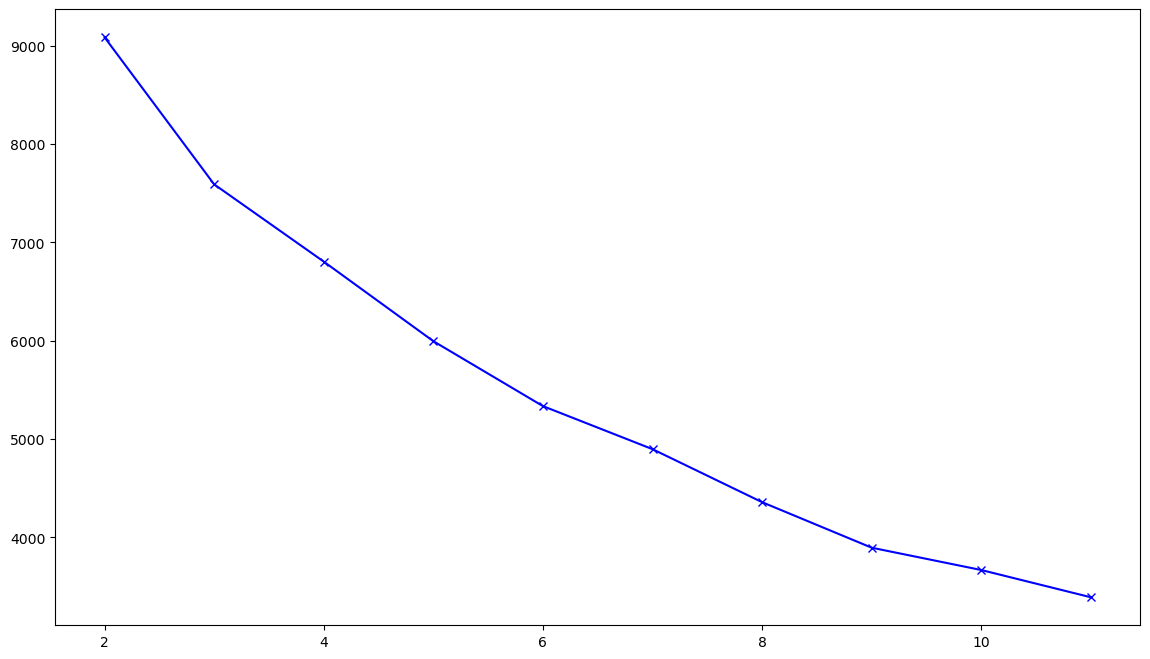

In [26]:
plt.figure(figsize=(14,8))
plt.plot(K,apoio,'bx-')
plt.show()

Número ideal de clusters = 3

### PCA (Principal Component Analysis)

In [27]:
from sklearn.decomposition import PCA

pca = PCA (n_components = 2, random_state=123)
df_pca = pd.DataFrame(pca.fit_transform(X.drop(columns=cols_to_drop)),columns=[0,1])
df_pca_test = pd.DataFrame(pca.transform(X_test.drop(columns=cols_to_drop)),columns=[0,1])

Projeção PCA de duas componentes

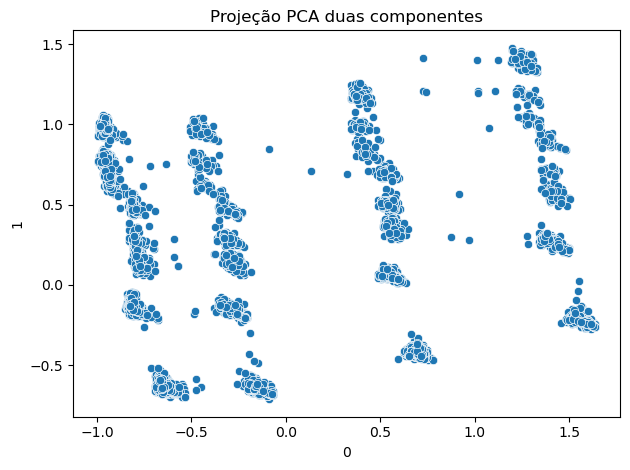

In [31]:
sns.scatterplot(data=df_pca,x=0,y=1)
plt.title('Projeção PCA duas componentes')
plt.tight_layout()
plt.show()

In [32]:
kmeans_model = KMeans(n_clusters = 3, random_state = 123)
y = kmeans_model.fit_predict(df_pca)

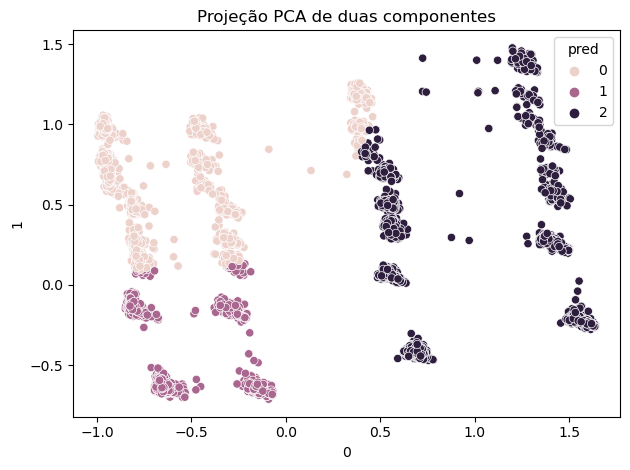

In [33]:
df_pca['pred'] = y
sns.scatterplot(data=df_pca,x=0,y=1,hue='pred')
plt.title('Projeção PCA de duas componentes')
plt.tight_layout()
plt.show()

In [38]:
cat_cols = df_train.columns.tolist()

In [40]:
cat_cols

['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Profession_Artist',
 'Profession_Doctor',
 'Profession_Engineer',
 'Profession_Entertainment',
 'Profession_Executive',
 'Profession_Healthcare',
 'Profession_Homemaker',
 'Profession_Lawyer',
 'Profession_Marketing',
 'Var_1_Cat_1',
 'Var_1_Cat_2',
 'Var_1_Cat_3',
 'Var_1_Cat_4',
 'Var_1_Cat_5',
 'Var_1_Cat_6',
 'Var_1_Cat_7']

In [39]:
final_df = df_train.drop(columns = cols_to_drop+cat_col, errors = 'ignore')
final_df["pred"] = y
final_df = final_df.merge(df_train[["ID"]+cat_col], on = "ID", how="left")


KeyError: "['Profession', 'Var_1'] not in index"